In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [ ]:
filename = "https://raw.githubusercontent.com/adisamatulia/HasilReview_Textmining/main/reviews_hotels.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,hotel_name,name,rating,review
0,RedDoorz Hostel @ DI Panjaitan Simpang Lima,Pachadella Yolanro,3.0,I went to semarang for bussines purpose . I ha...
1,RedDoorz Hostel @ DI Panjaitan Simpang Lima,Teuku April,5.0,"Cheap price! I got a room by only Rp 66.000,- ..."
2,RedDoorz Hostel @ DI Panjaitan Simpang Lima,Unggul Prayitno (astrastasia),5.0,"Good place to rest, fair price and located nea..."
3,RedDoorz Hostel @ DI Panjaitan Simpang Lima,budi daryono,4.0,mayanRooms: 3/5 | Service: 3/5 | Location: 3/5...
4,RedDoorz Hostel @ DI Panjaitan Simpang Lima,Ersa Nanda Pratama,5.0,"awesome, many thanks for quick check in at lat..."
...,...,...,...,...
295,RedDoorz @ Jalan Setiabudi Semarang,Djoko Suhartantyo,2.0,"(Translated by Google) Rooms are too small, fa..."
296,RedDoorz @ Jalan Setiabudi Semarang,Yanto Godam,5.0,"(Translated by Google) Strategic location, cle..."
297,RedDoorz @ Jalan Setiabudi Semarang,Wandi Irawan,5.0,(Translated by Google) Good service cheap hote...
298,RedDoorz @ Jalan Setiabudi Semarang,Eko Prasetyo,5.0,"(Translated by Google) Good night watchman, fr..."


In [ ]:
df.drop(columns = ['hotel_name', 'name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,3.0,I went to semarang for bussines purpose . I ha...
1,5.0,"Cheap price! I got a room by only Rp 66.000,- ..."
2,5.0,"Good place to rest, fair price and located nea..."
3,4.0,mayanRooms: 3/5 | Service: 3/5 | Location: 3/5...
4,5.0,"awesome, many thanks for quick check in at lat..."


Preprocessing Data

Cleaning The Text

In [ ]:
import string
import re

In [ ]:
def clean_Review(Review):
    return re.sub('[^a-zA-Z]', ' ', Review).lower()
  
df['cleaned_Review'] = df['Review'].apply(lambda x: clean_Review(str(x)))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features - length of, and percentage of punctuations in the text

In [ ]:
def count_punct(Review):
    count = sum([1 for char in Review if char in string.punctuation])
    return round(count/(len(Review) - Review.count(" ")), 3)*100
  
df['Review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_Review,label,Review_len,punct
0,3.0,I went to semarang for bussines purpose . I ha...,i went to semarang for bussines purpose i ha...,0,321,2.8
1,5.0,"Cheap price! I got a room by only Rp 66.000,- ...",cheap price i got a room by only rp ...,1,379,5.8
2,5.0,"Good place to rest, fair price and located nea...",good place to rest fair price and located nea...,1,105,1.9
3,4.0,mayanRooms: 3/5 | Service: 3/5 | Location: 3/5...,mayanrooms service location ...,1,46,17.4
4,5.0,"awesome, many thanks for quick check in at lat...",awesome many thanks for quick check in at lat...,1,44,2.3
...,...,...,...,...,...,...
295,2.0,"(Translated by Google) Rooms are too small, fa...",translated by google rooms are too small fa...,0,183,4.4
296,5.0,"(Translated by Google) Strategic location, cle...",translated by google strategic location cle...,1,284,5.6
297,5.0,(Translated by Google) Good service cheap hote...,translated by google good service cheap hote...,1,116,10.3
298,5.0,"(Translated by Google) Good night watchman, fr...",translated by google good night watchman fr...,1,176,3.4


Tokenization

In [ ]:
def tokenize_Review(Review):
    tokenized_Review = Review.split()
    return tokenized_Review
  
df['tokens'] = df['cleaned_Review'].apply(lambda x: tokenize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens
0,3.0,I went to semarang for bussines purpose . I ha...,i went to semarang for bussines purpose i ha...,0,321,2.8,"[i, went, to, semarang, for, bussines, purpose..."
1,5.0,"Cheap price! I got a room by only Rp 66.000,- ...",cheap price i got a room by only rp ...,1,379,5.8,"[cheap, price, i, got, a, room, by, only, rp, ..."
2,5.0,"Good place to rest, fair price and located nea...",good place to rest fair price and located nea...,1,105,1.9,"[good, place, to, rest, fair, price, and, loca..."
3,4.0,mayanRooms: 3/5 | Service: 3/5 | Location: 3/5...,mayanrooms service location ...,1,46,17.4,"[mayanrooms, service, location, more]"
4,5.0,"awesome, many thanks for quick check in at lat...",awesome many thanks for quick check in at lat...,1,44,2.3,"[awesome, many, thanks, for, quick, check, in,..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def lemmatize_Review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_Review'] = df['tokens'].apply(lambda x: lemmatize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens,lemmatized_Review
0,3.0,I went to semarang for bussines purpose . I ha...,i went to semarang for bussines purpose i ha...,0,321,2.8,"[i, went, to, semarang, for, bussines, purpose...",went semarang bussines purpose hour trip arive...
1,5.0,"Cheap price! I got a room by only Rp 66.000,- ...",cheap price i got a room by only rp ...,1,379,5.8,"[cheap, price, i, got, a, room, by, only, rp, ...",cheap price got room rp promo reddoorz app hos...
2,5.0,"Good place to rest, fair price and located nea...",good place to rest fair price and located nea...,1,105,1.9,"[good, place, to, rest, fair, price, and, loca...",good place rest fair price located near center...
3,4.0,mayanRooms: 3/5 | Service: 3/5 | Location: 3/5...,mayanrooms service location ...,1,46,17.4,"[mayanrooms, service, location, more]",mayanrooms service location
4,5.0,"awesome, many thanks for quick check in at lat...",awesome many thanks for quick check in at lat...,1,44,2.3,"[awesome, many, thanks, for, quick, check, in,...",awesome many thanks quick check late night


EDA

In [ ]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"Rating 1.0 = { len(df[df['Rating']==1.0]) } rows")
print(f"Rating 2.0 = { len(df[df['Rating']==2.0]) } rows")
print(f"Rating 3.0 = { len(df[df['Rating']==3.0]) } rows")
print(f"Rating 4.0 = { len(df[df['Rating']==4.0]) } rows")
print(f"Rating 5.0 = { len(df[df['Rating']==5.0]) } rows")

Input data has 300 rows and 8 columns
Rating 1.0 = 28 rows
Rating 2.0 = 21 rows
Rating 3.0 = 50 rows
Rating 4.0 = 69 rows
Rating 5.0 = 132 rows


Number of null in label: 0
Number of null in text: 0


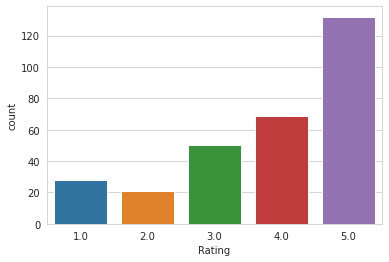

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);

Visualizing Word Clouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0) ]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_Review'].tolist()
positive_list=df_positive['lemmatized_Review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()


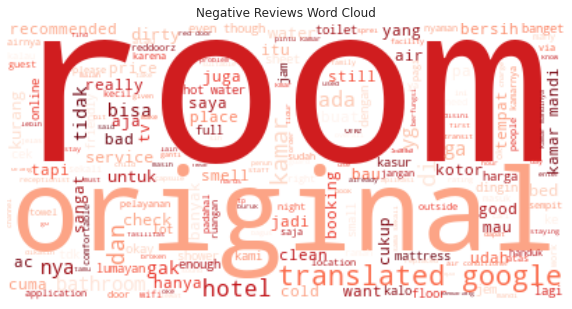

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

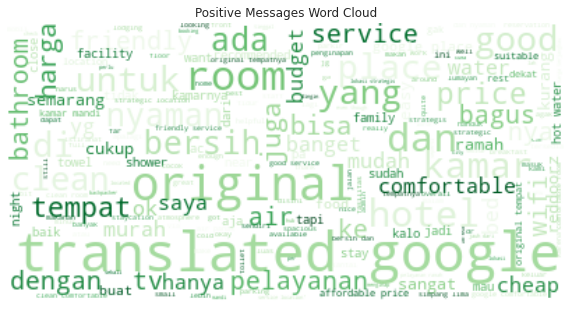

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [ ]:
X = df[['lemmatized_Review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(300, 3)
(300,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 3)
(90, 3)
(210,)
(90,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_Review'])
tfidf_test = tfidf.transform(X_test['lemmatized_Review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,321,6.2,0.0,0.0

Training different Classification models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.67      1.00      0.80        60

    accuracy                           0.67        90
   macro avg       0.33      0.50      0.40        90
weighted avg       0.44      0.67      0.53        90



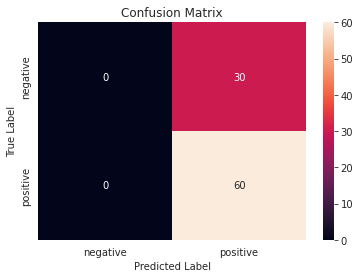

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       0.78      0.23      0.36        30
           1       0.72      0.97      0.82        60

    accuracy                           0.72        90
   macro avg       0.75      0.60      0.59        90
weighted avg       0.74      0.72      0.67        90



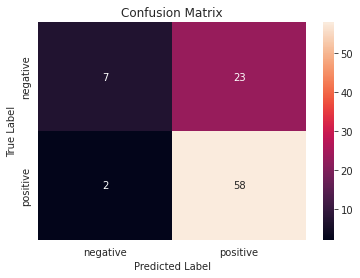

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.13      0.24        30
           1       0.70      1.00      0.82        60

    accuracy                           0.71        90
   macro avg       0.85      0.57      0.53        90
weighted avg       0.80      0.71      0.63        90



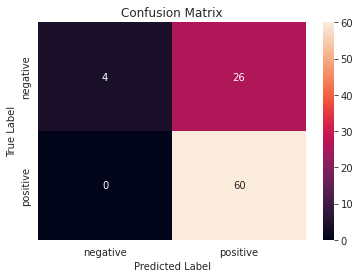

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.69      0.37      0.48        30
           1       0.74      0.92      0.82        60

    accuracy                           0.73        90
   macro avg       0.72      0.64      0.65        90
weighted avg       0.72      0.73      0.71        90



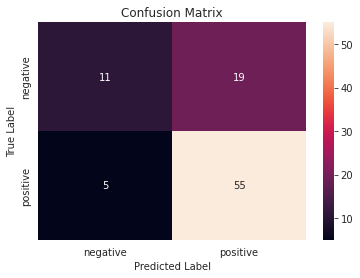

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.44      0.23      0.30        30
           1       0.69      0.85      0.76        60

    accuracy                           0.64        90
   macro avg       0.56      0.54      0.53        90
weighted avg       0.61      0.64      0.61        90



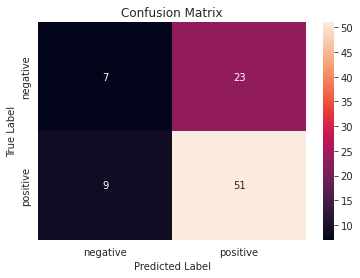

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       0.64      0.30      0.41        30
           1       0.72      0.92      0.81        60

    accuracy                           0.71        90
   macro avg       0.68      0.61      0.61        90
weighted avg       0.70      0.71      0.68        90



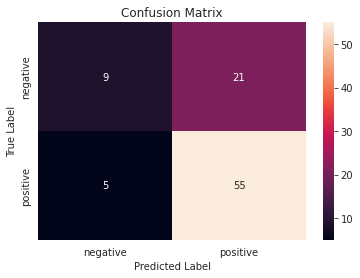

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K=10

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.6714285714285715 
 precision - 0.6714285714285715 
 recall - 1.0 
 f1 - 0.8033333333333333 

Logistic Regression
 accuracy - 0.7333333333333334 
 precision - 0.7309528723770209 
 recall - 0.9571428571428571 
 f1 - 0.8282588695302167 

Random Forest
 accuracy - 0.7761904761904761 
 precision - 0.786219961668878 
 recall - 0.9290476190476191 
 f1 - 0.8452998220726252 

SVM
 accuracy - 0.7666666666666667 
 precision - 0.7846889140271494 
 recall - 0.9076190476190478 
 f1 - 0.8399919055216609 

KNN
 accuracy - 0.7095238095238096 
 precision - 0.7704914529914529 
 recall - 0.8080952380952382 
 f1 - 0.7869204980842912 

Extra Trees
 accuracy - 0.7666666666666666 
 precision - 0.7982107843137255 
 recall - 0.8857142857142858 
 f1 - 0.8355498274435982 



prediction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_Review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [ ]:
#Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.7666666666666667

In [ ]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 1]
